# 📦 Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

C:\Users\tilak\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 📂 Load Data

In [2]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 📊 EDA - Correlation Heatmap

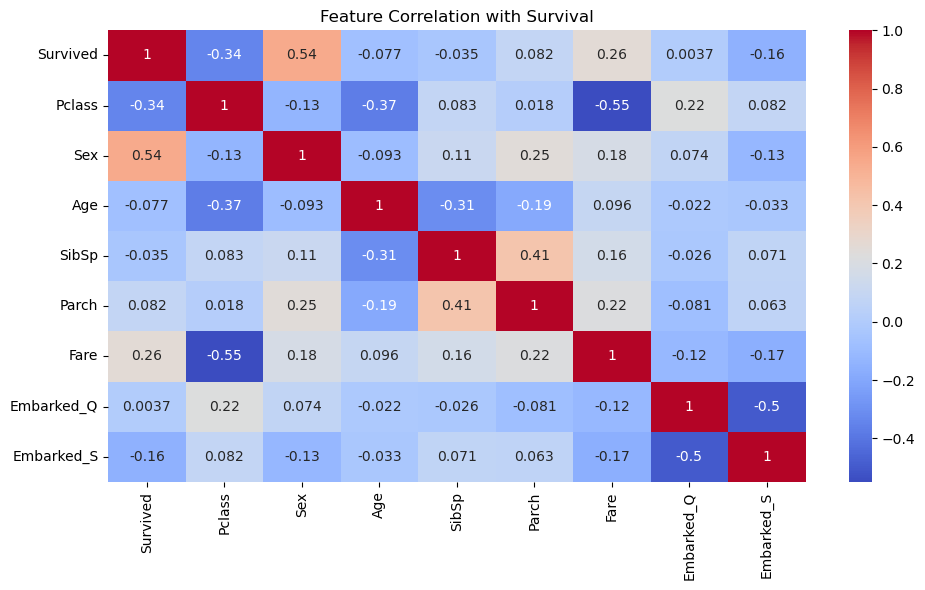

In [4]:
eda_df = train_df.copy()
eda_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')
eda_df['Sex'] = eda_df['Sex'].map({'male': 0, 'female': 1})
eda_df = pd.get_dummies(eda_df, columns=['Embarked'], drop_first=True)

plt.figure(figsize=(10,6))
sns.heatmap(eda_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Survival")
plt.tight_layout()
plt.savefig("../images/correlation_heatmap.png", bbox_inches='tight')
plt.show()

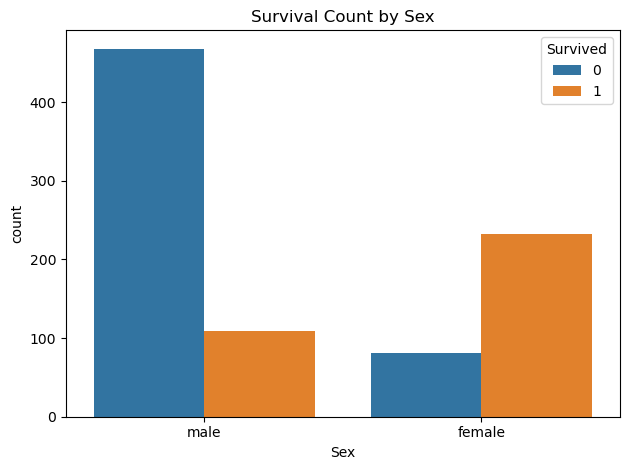

C:\Users\tilak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tilak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\tilak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


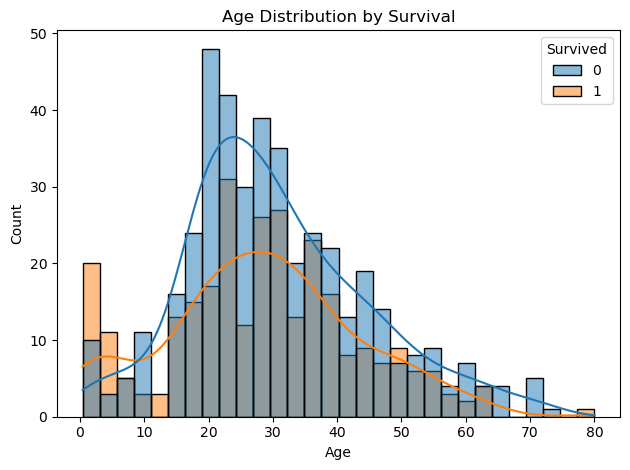

In [5]:
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title("Survival Count by Sex")
plt.tight_layout()
plt.savefig("../images/survival_by_sex.png")
plt.show()

sns.histplot(data=train_df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.tight_layout()
plt.savefig("../images/age_distribution.png", bbox_inches='tight')
plt.show()

# 🧹 Preprocess Data

In [6]:
def preprocess(df):
    df = df.drop(['Ticket', 'Cabin'], axis=1)
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
    
    return df

In [7]:
train_df = preprocess(train_df)
test_df = preprocess(test_df)

X = train_df.drop(['Survived', 'Name', 'PassengerId'], axis=1)
y = train_df['Survived']
passenger_ids = test_df['PassengerId']
X_test_final = test_df.drop(['Name', 'PassengerId'], axis=1)

C:\Users\tilak\AppData\Local\Temp\ipykernel_10464\3351137457.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\tilak\AppData\Local\Temp\ipykernel_10464\3351137457.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

# 🤖 Train Model

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

# 📈 Evaluate

In [9]:
pred_train = model.predict(X)
print("Training Accuracy:", accuracy_score(y, pred_train))
print(classification_report(y, pred_train))

Training Accuracy: 0.9797979797979798
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



# 🧾 Predict for Kaggle Test Data

In [10]:
predictions = model.predict(X_test_final)
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})
submission.to_csv("../submission.csv", index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
